# Process to follow while working on Imbalance Data

#### 1. Begin by analyzing the distribution of classes within your dataset to understand the extent of the imbalance.
#### 2. Determine the importance of each class in the context of your specific problem.
#### 3. Increase the number of instances in the minority class by replicating them to balance the class distribution.
#### 4. Some algorithms, like tree-based methods, are less sensitive to class imbalance. Consider using these or ensemble   methods like Random Forest or Gradient Boosted Trees.
#### 5. Besides accuracy, use metrics that are informative for imbalanced datasets, such as Precision, Recall, F1 Score, or the Area Under the Receiver Operating Characteristic (AUROC) curve.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
imbalance_df = pd.read_csv('Insurance claims data.csv',encoding='UTF-8')

In [3]:
imbalance_df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [4]:
imbalance_df.shape

(58592, 41)

<b> So Dataset have 58592 records with 41 features

In [5]:
imbalance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

<b> There are lot of categorical features as well, we will handle them if required going forward.

In [6]:
imbalance_df.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [7]:
imbalance_df.duplicated().sum()

0

<b> So, our dataset have no null values and no duplicate values.

In [8]:
imbalance_df['claim_status'].value_counts()

claim_status
0    54844
1     3748
Name: count, dtype: int64

### <b> Now we will perform exploratory data analysis to visualize and understand the distributions, relationships, and patterns in the data. It will include examining the distribution of the target variable and key features.

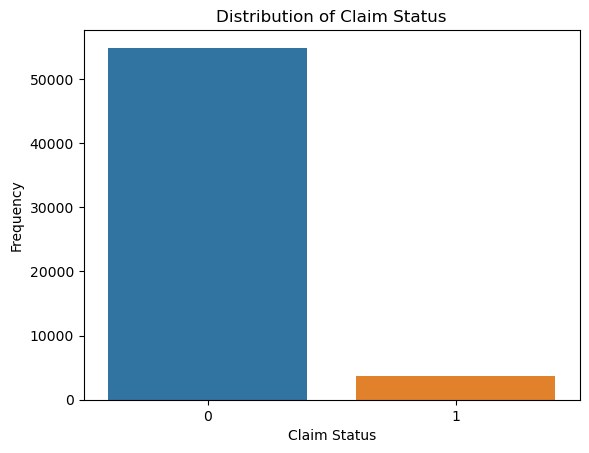

In [9]:
#1. Let's plot the distribution of target variable Cliam Status.
sns.countplot(x=imbalance_df['claim_status'])
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Frequency')
plt.show()

<b> From above figure, we can easily see that, there is lot of imbalance in our data. Claim(0) is having lot more records that No Claim(1). This will be give rise to lot more issue while prediction of majority class will have more impact on prediction.

#### Now we will perform an analysis of both numerical and categorical features to understand their distributions and relationships with the claim_status. We will start examining the distributions of some key numerical features such as subscription_length, vehicle_age, and customer_age

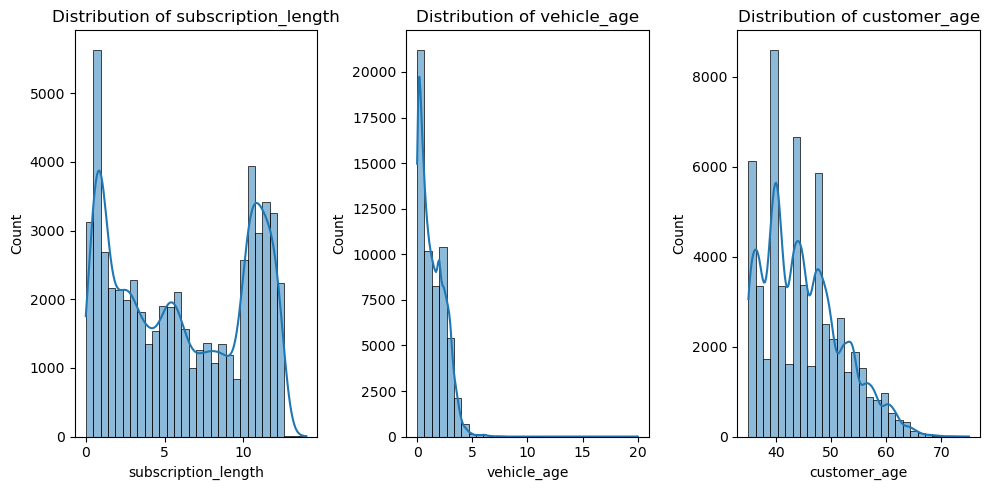

In [10]:
numerical_columns = ['subscription_length','vehicle_age','customer_age']

plt.figure(figsize=(10,5))
for i, column in enumerate(numerical_columns,1):
    plt.subplot(1,3,i)
    sns.histplot(imbalance_df[column],bins=30,kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

<b> From above distributions, we can conclude following things
1. subscription_length: Most values are clustered around lower numbers, indicating that many policies have shorter subscription lengths.

2. vehicle_age: This distribution is somewhat uniform but with spikes at specific ages, possibly representing common vehicle age intervals in the dataset.

3. customer_age: This shows a fairly normal distribution, with the majority of customers falling within a middle-age range.

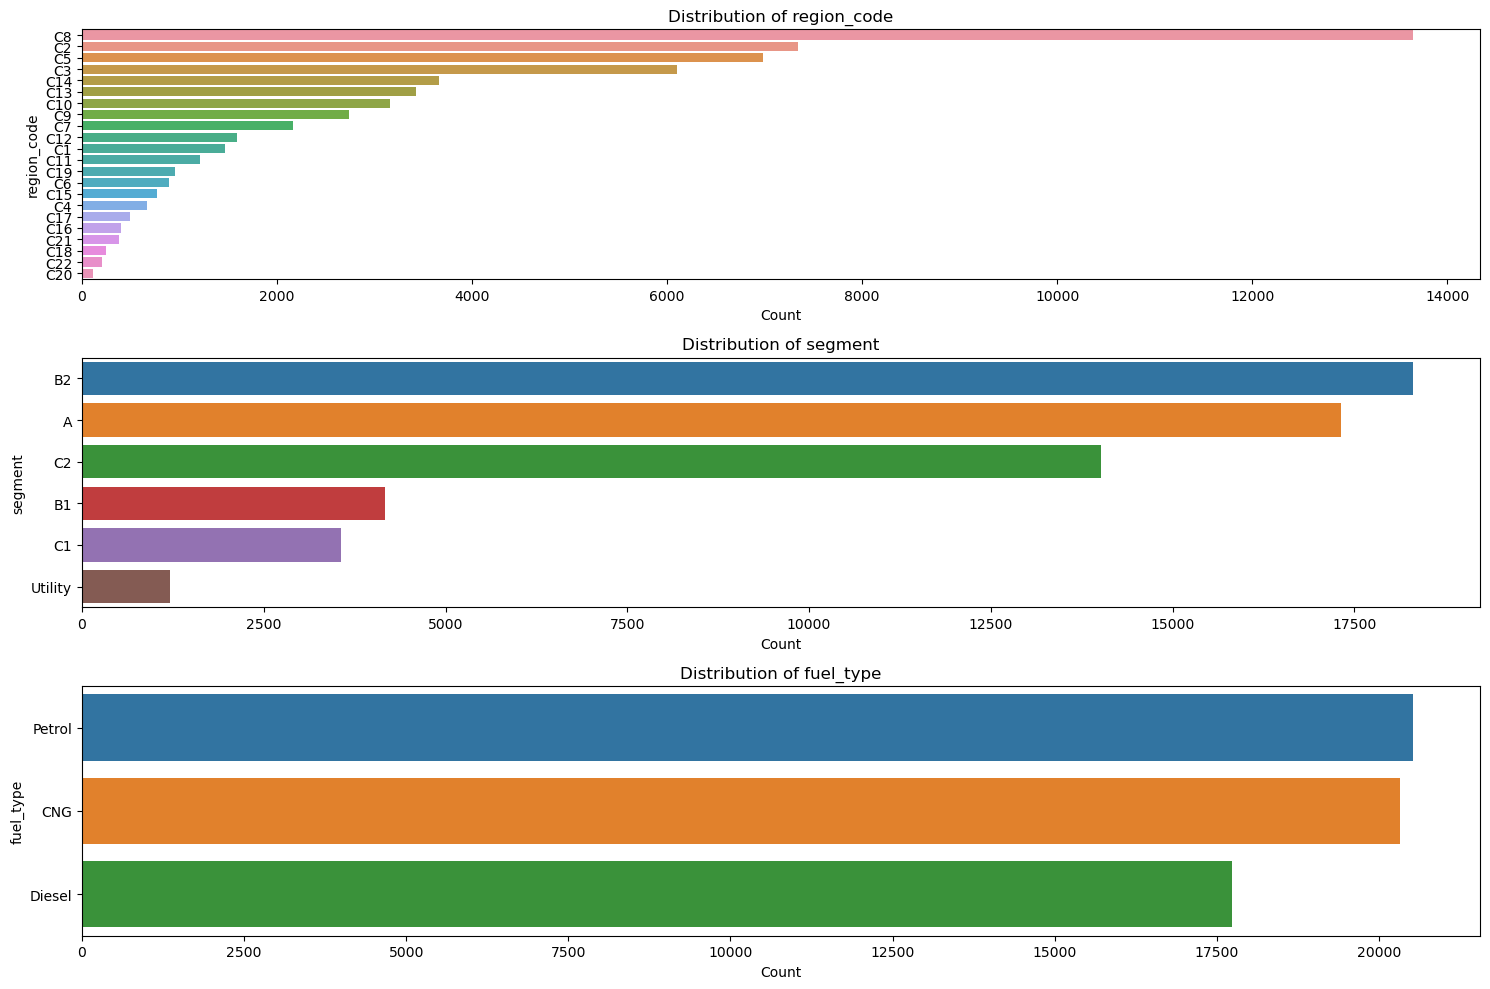

In [11]:
categorical_columns = ['region_code','segment','fuel_type']

plt.figure(figsize=(15,10))

for i, column in enumerate(categorical_columns,1):
    plt.subplot(3,1,i)
    sns.countplot(y=imbalance_df[column],order=imbalance_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

<b> From above distributions, we can conclude following things
1. For 'region_code' there is a wide variety of codes, each with varying counts, but a few specific codes dominate with much higher counts than others. 

2. In the 'segment' distribution, there are fewer categories, with the ‘B2’ segment being the most common, followed by ‘A’ and ‘C2,’ and the ‘Utility’ segment being the least common.

3. 'fuel_type' shows three categories: ‘Petrol’ has the highest count than CNG and Diesel

### <b> Let's handle imbalance problem now. We will use oversampling here, which will resample minority class

In [12]:
from sklearn.utils import resample

# First seperate majority and minority classes
majority = imbalance_df[imbalance_df.claim_status == 0]
minority = imbalance_df[imbalance_df.claim_status == 1]

minority_sampled = resample(minority,replace=True,n_samples=len(majority),random_state=42)

oversampled_data = pd.concat([majority,minority_sampled])

In [13]:
oversampled_data.claim_status.value_counts()

claim_status
0    54844
1    54844
Name: count, dtype: int64

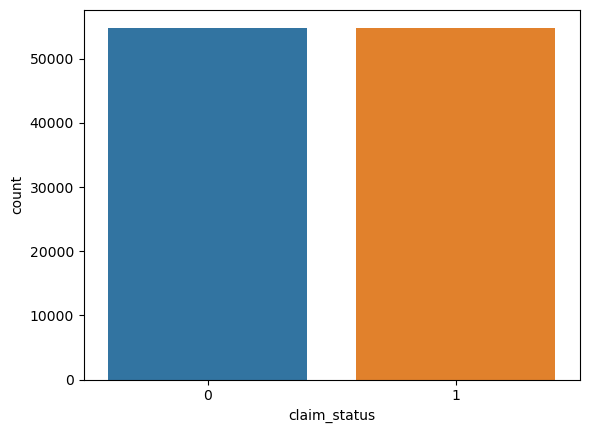

In [14]:
sns.countplot(x=oversampled_data.claim_status)
plt.show()

### <b>Let's plot the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'

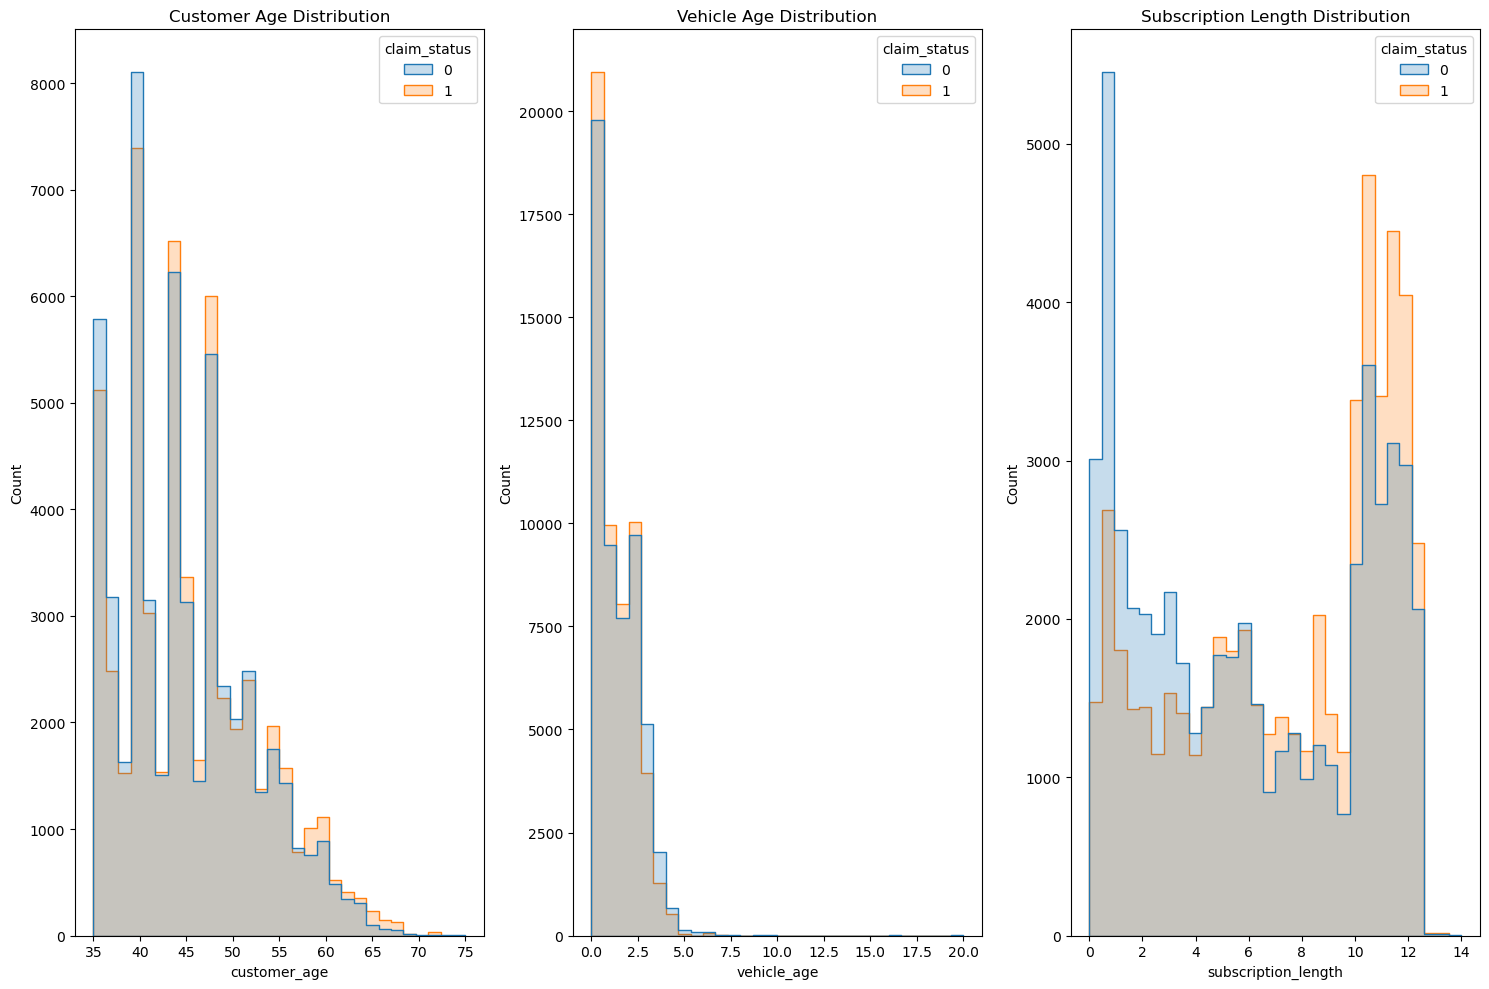

In [15]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
sns.histplot(x=oversampled_data.customer_age,hue=oversampled_data.claim_status,element='step',bins=30)
plt.title('Customer Age Distribution')

plt.subplot(1,3,2)
sns.histplot(x=oversampled_data.vehicle_age,hue=oversampled_data.claim_status,element='step',bins=30)
plt.title('Vehicle Age Distribution')

plt.subplot(1,3,3)
sns.histplot(x=oversampled_data.subscription_length,hue=oversampled_data.claim_status,element='step',bins=30)
plt.title('Subscription Length Distribution')

plt.tight_layout()
plt.show()

### <b> Let's Apply Feature Selection now. For our data, we won't be needing all the features. Some features may not be of more importance, so better to consider only required one.

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

le = LabelEncoder()
encoded_features = imbalance_df.apply(lambda col:le.fit_transform(col) if col.dtype == 'object' else col)

#Let's seperate input and output feature
X = encoded_features.drop(['claim_status'],axis=1)
y = encoded_features['claim_status']

In [17]:
rf = RandomForestClassifier()
rf.fit(X,y)

feature_importance = rf.feature_importances_

feature_df = pd.DataFrame({'Features':X.columns,'Importance':feature_importance})
feature_df = feature_df.sort_values(by='Importance',ascending=False)

In [18]:
feature_df

,Features,Importance
0,policy_id,0.319463
1,subscription_length,0.246860
3,customer_age,0.172935
2,vehicle_age,0.136112
5,region_density,0.056946
4,region_code,0.055299
7,model,0.001022
26,gross_weight,0.000855
24,length,0.000828
11,engine_type,0.000777


### <b> Let's consider dropping policy_id feature as it may dominate the other features for our model training and predictions i.e model building phase

<b> For model building phase, we will use Random Forest, Adaboost Gradient boosting and XG Boost Algorithms as these ensemble algorithms are less sensitive to class imbalance.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
models = {
    "Random Forest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "XGBoost":XGBClassifier()
}

In [21]:
# Let's have some HyperParameter Tuning as well
from sklearn.model_selection import RandomizedSearchCV

params = {
    'Random Forest':{
        'n_estimators':[int(x) for x in np.linspace(10, 220, num = 22)],
        'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],
        'min_samples_split':[int(x) for x in np.linspace(10, 110, num = 11)],
        'min_samples_leaf':[int(x) for x in np.linspace(10, 110, num = 11)]
    },
    'AdaBoost':{
        'n_estimators':[int(x) for x in np.linspace(10, 220, num = 22)],
        'learning_rate':[0.001,0.005,0.1,0.2,0.3,0.4,0.5,0.7,1,2,3]
    },
    'Gradient Boost':{
        'n_estimators':[int(x) for x in np.linspace(10, 220, num = 22)],
        'learning_rate':[0.001,0.005,0.1,0.2,0.3,0.4,0.5,0.7,1,2,3],
        'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion':['friedman_mse', 'squared_error'],
        'min_samples_leaf':[int(x) for x in np.linspace(10, 110, num = 11)]
    },
    'XGBoost':{
        'n_estimators':[int(x) for x in np.linspace(10, 220, num = 22)],
        'learning_rate':[0.001,0.005,0.1,0.2,0.3,0.4,0.5,0.7,1,2,3]
    }
}

In [22]:
oversampled_data = oversampled_data.drop(['policy_id'],axis=1)

X_oversampled = oversampled_data.drop(['claim_status'],axis=1)

X_oversampled_data_encoded = X_oversampled.apply(lambda col:le.fit_transform(col) if col.dtype=='object' else col)

y_oversampled = oversampled_data['claim_status']

X_train,X_test,y_train,y_test = train_test_split(X_oversampled_data_encoded,y_oversampled,test_size=0.2,random_state=42)

In [23]:
def evaluate_model(X_train,y_train,X_test,y_test,models,params):
    for i in range(len(list(models))):
        model = list(models.values())[i]
        param = params[list(models.keys())[i]]
        
        rs = RandomizedSearchCV(model,param,cv=5)
        rs.fit(X_train,y_train)
        
        model.set_params(**rs.best_params_)
        model.fit(X_train,y_train)
        
        y_pred = model.predict(X_test)
        print("For",list(models.keys())[i])
        print('Classification Report is:')
        print(classification_report(y_pred,y_test))
        print('Confusion Matrix is:')
        print(confusion_matrix(y_pred,y_test))

In [24]:
evaluate_model(X_train,y_train,X_test,y_test,models,params)

For Random Forest
Classification Report is:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      9867
           1       0.88      0.79      0.83     12071

    accuracy                           0.83     21938
   macro avg       0.83      0.83      0.83     21938
weighted avg       0.83      0.83      0.83     21938

Confusion Matrix is:
[[8562 1305]
 [2522 9549]]
For AdaBoost
Classification Report is:
              precision    recall  f1-score   support

           0       0.53      0.63      0.58      9343
           1       0.68      0.59      0.63     12595

    accuracy                           0.61     21938
   macro avg       0.61      0.61      0.60     21938
weighted avg       0.62      0.61      0.61     21938

Confusion Matrix is:
[[5899 3444]
 [5185 7410]]
For Gradient Boost
Classification Report is:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10645
           1 

<b> We can see that in this case Gradient boosting is performing really well in comparison to other ensemble algorithms like XGboost, Adaboost and Random Forest.